...done using [Markdown Cheat Sheet](https://gtribello.github.io/mathNET/assets/notebook-writing.html) and [Unofficial Jupyter Extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html)

# Imports and Installations

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
#import custom_functions as func
#import analysis_functions as afunc
#import prep_data as prep
#import plot_functions as plot

# Custom Functions

In [15]:
# get data as dataframe
def read_csv():
    df = pd.read_csv("C:/Users/Andrea/PycharmProjects/datascience/data/StackOverflow2020/survey_results_public.csv")  # df with answers
    schema = pd.read_csv("C:/Users/Andrea/PycharmProjects/datascience/data/StackOverflow2020/survey_results_schema.csv")  # df with questions
    return df, schema

In [16]:
# get description of a column (desc) as string by providing the column name (column_name)
def get_description(column_name, schema=schema):
    desc = schema.set_index('Column').loc[f'{column_name}']['QuestionText']
    return desc

In [17]:
# get the percentage of NaN values (perc_nan) and the number of columns with more than x percent of values missing (perc_nan_over_x) in df
def get_nan_perc(df, threshold):
    # columns with corresponding percentage of nan values
    perc_nan = df.isnull().sum()/len(df)
    # columns with more than x percent of nan values
    perc_nan_over_x = (df.isnull().sum()/len(df)) > threshold
    # number of columns
    number_over_x = np.sum(perc_nan > threshold)
    return perc_nan, perc_nan_over_x, number_over_x

In [18]:
# drop all missing values from a given subset or target column
def dropna_subset(df, subset):
    df = df.dropna(subset=[subset]).copy(deep=True)
    return df

In [19]:
def feature_overview(df, feature_column, dropna=False):
    val_counts = df[feature_column].value_counts(dropna=dropna)
    overview_df = pd.DataFrame({'count': val_counts, 'share': val_counts / val_counts.sum()})
    return overview_df

In [20]:
def feature_by_x(df, feature, x_column):
    # get feature counts per x_column & unstack multi-index
    counts = df.groupby(x_column)[feature].value_counts().unstack(level=0)
    # get feature percentages per x_column & unstack multi-index (get x by feature dataframe)
    shares = counts.apply(lambda x: x/x.sum())
    return counts, shares

In [21]:
def get_multiple_choice_answers():
    DevTypeAnswers = ["Academic researcher",
                    "Data or business analyst",
                    "Data scientist or machine learning specialist",
                    "Database administrator",
                    "Designer",
                    "Developer, back-end",
                    "Developer, desktop or enterprise applications",
                    "Developer, embedded applications or devices",
                    "Developer, front-end",
                    "Developer, full-stack",
                    "Developer, game or graphics",
                    "Developer, mobile",
                    "Developer, QA or test",
                    "DevOps specialist",
                    "Educator",
                    "Engineer, data",
                    "Engineer, site reliability",
                    "Engineering manager",
                    "Marketing or sales professional",
                    "Product manager",
                    "Scientist",
                    "Senior Executive (C-Suite, VP, etc.)",
                    "System administrator"]
    NEWJobHuntAnswers = ['Just because',
                        'Having a bad day (or week or month) at work',
                        'Wanting to share accomplishments with a wider network',
                        'Curious about other opportunities',
                        'Better compensation',
                        'Trouble with my teammates',
                        'Trouble with my direct manager',
                        'Trouble with leadership at my company',
                        'Better work/life balance',
                        'Wanting to work with new technologies',
                        'Growth or leadership opportunities',
                        'Looking to relocate']
    JobFactorsAnswers = ['Remote work options',
                        'Office environment or company culture',
                        'Financial performance or funding status of the company or organization',
                        'Opportunities for professional development',
                        'Diversity of the company or organization',
                        'How widely used or impactful my work output would be',
                        'Industry that I’d be working in',
                        'Specific department or team I’d be working on',
                        'Flex time or a flexible schedule',
                        'Languages, frameworks, and other technologies I’d be working with',
                        'Family friendliness']
    return DevTypeAnswers, NEWJobHuntAnswers, JobFactorsAnswers

In [22]:
def dummy_multiple_choice(df, column, answer_list):
    for x in answer_list:
        sername = column + '_' + str(answer_list.index(x))
        ser = df[column].str.contains(x).rename(sername).to_frame()*1
        df = pd.concat([df, ser], axis=1)
    return df

In [23]:
def get_multiple_choice(df, column_regex, answerlist_mc):
    df_mc = df.filter(regex=column_regex, axis=1).dropna().sum().rename('count')
    share = df_mc / df.shape[0]
    df_mc = pd.concat\
        ([df_mc, share.rename('share'), pd.Series(answerlist_mc, index=df_mc.index, name='answers')], axis=1)\
        .set_index('answers')
    return df_mc

In [24]:
def new_happy_bins(df):
    # make 3 new categories for categories column (excl. NaN)
    df['Job_Satisfaction_bins'] = df['Job_Satisfaction'].replace({'Very satisfied': 'satisfied',
                                              'Slightly satisfied': 'satisfied',
                                              'Very dissatisfied': 'dissatisfied',
                                              'Slightly dissatisfied': 'dissatisfied',
                                              'Neither satisfied nor dissatisfied': 'neither'})
    happy_index = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied',
                   'Slightly dissatisfied', 'Very dissatisfied', 'not answered']
    happy_index_bins = ['satisfied', 'dissatisfied', 'neither']
    return df, happy_index, happy_index_bins

# Plot Functions

In [29]:
# draws a pie chart and saves it as PNG
def pie_chart(df, column, title='pie_chart', filename='pie_chart', colors=['#3EA607', '#5F9343', '#868686', '#93435F', '#A6073E']):
    series = df[column].dropna()
    pie, ax = plt.subplots(figsize=(10,4))
    plt.pie(x=series, autopct="%1.1f%%", explode= [0.02]*series.shape[0], labels=series.keys(), colors=colors)
    plt.title(title, fontsize=12)
    plt.tight_layout()
    pie.savefig(f"results/{filename}.png")
    return pie, ax

In [47]:
# draws a horizontal bar chart and saves it as PNG
def horizontal_bars(df, column, percentage=True, xlabel='', title='bar_plot', filename='bar_plot'):
    # sort descending by column value
    df = df.sort_values(column, ascending=False)
    if percentage == True:
        df = df*100
    # plot
    bar, ax = plt.subplots(figsize=(10,4))
    # ax.xaxis.grid(True, linestyle='--', linewidth=.7, color='#B7B7B7')
    # ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    bars = ax.barh(df.index, width=df[column], height=0.9, align='center', color='#739D81')
    for b in bars:
        height = b.get_height()
        width = b.get_width()
        position = b.get_y()
        ax.annotate('{}'.format(round(width, 1)), xy=(width/2, height/2 + position), va='center', fontsize=8)
    ax.set_yticklabels(df.index, fontsize=8)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_title(title, fontsize=12)
    plt.tight_layout()
    bar.savefig(f"results/{filename}.png")
    return bar, ax

In [49]:
# horizontal bar chart for a GroupBy DataFrame
def horizontal_bars_df(df, percentage=True, xlabel='', title='bar_plot', color=['#A26B61', '#6198A2'], filename='bar_plot'):
    # sort descending by column value
    if percentage == True:
        df = df*100
    # plot
    bar, ax = plt.subplots(figsize=(10,4))
    ax.xaxis.grid(True, linestyle='--', linewidth=.7, color='#B7B7B7')
    # ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    cols = list(df.columns)
    for c, clr in zip(cols, color):
        bars = ax.barh(y=df.index, width=df[c], height=0.9/len(cols), align='center', color=clr, label=c)
        for b in bars:
            height = b.get_height()
            width = b.get_width()
            position = b.get_y()
            if width > 0:
                ax.annotate('{}'.format(round(width, 1)), xy=(width+.05, height/2+position), va='center', fontsize=8)
            if width <= 0:
                ax.annotate('{}'.format(round(width, 1)), xy=(width-.15, height/2+position), va='center', fontsize=8)
    ax.set_yticklabels(df.index, fontsize=8)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_title(title, fontsize=12)
    plt.legend()
    plt.tight_layout()
    bar.savefig(f"results/{filename}.png")
    return bar, ax

In [50]:
# horizontal bar chart for a GroupBy DataFrame
def horizontal_bars_df_multi(df, title='', color=['#6198A2','#A26B61'], filename='bar_plot', percentage=True):
    if percentage == True:
        df = df*100
    ax = df.plot.barh(title=title, grid=True, color=color, figsize=(10,4))
    fig = ax.get_figure()
    plt.tight_layout()
    fig.savefig(f"results/{filename}.png")
    return fig, ax

# Load & View Data

In [26]:
df_raw, schema = func.read_csv()
df = df_raw.copy(deep=True)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [27]:
#### get an overview of the dataframe ####
# get column descriptions (respective survey questions)
survey_question = get_description('MainBranch')
# get dataframe dimensions
shape = df.shape
# overview over nan values
perc_nan, perc_nan_over_x, number_over_x = get_nan_perc(df, .5)

# Data Preparation

In [28]:
#### rename colums of interest for better readability
df = df.rename(columns={"PurchaseWhat": "Influence_On_Purchases", "JobSat": "Job_Satisfaction"})

#### create salary bins (yearly salary in USD) below and above median salary
df['Salary_Group'] = pd.cut(df['ConvertedComp'], bins=[0, df.ConvertedComp.median(), 2000000], labels=["below median", "above median"])

#### add dummies for multiple choice columns to extract number of individual mentions
DevTypeAnswers, NEWJobHuntAnswers, JobFactorsAnswers = func.get_multiple_choice_answers()
df = dummy_multiple_choice(df, 'DevType', DevTypeAnswers)
df = dummy_multiple_choice(df, 'NEWJobHunt', NEWJobHuntAnswers)
df = dummy_multiple_choice(df, 'JobFactors', JobFactorsAnswers)

df_full = df.copy(deep=True)
#### drop all missing values from target column: "job satisfaction"
df = prep.dropna_subset(df, 'Job_Satisfaction')
# define a fixed index order for "Job Satisfaction"
happy_index = ['Very satisfied', 
               'Slightly satisfied', 
               'Neither satisfied nor dissatisfied',
               'Slightly dissatisfied', 
               'Very dissatisfied', 
               'not answered']

C:\Users\Andrea\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


# Data Analysis

#### How satisfied are developers with their current jobs?

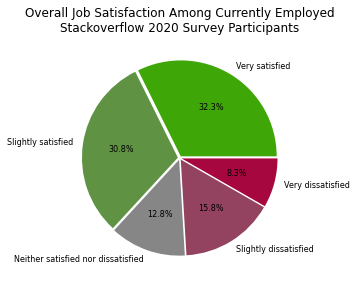

In [53]:
#### How satisfied are developers with their current work?
happy = feature_overview(df, 'Job_Satisfaction', dropna=True) # include only those who answered 
happy.index = happy.index.fillna(value='not answered')# rename nan values, if nans not dropped earlier
happy = happy.reindex(happy_index) # sort rows

# plot the distribution as pie chart
happy_pie, happy_ax = pie_chart(happy, 'share', title=f'Overall Job Satisfaction Among Currently Employed\nStackoverflow 2020 Survey Participants', filename='satisfaction_pie', colors=['#3EA607', '#5F9343', '#868686', '#93435F', '#A6073E'])

In [35]:
#### which group of developers remain among participants if we exclude NaNs from "Job Satisfaction"?
# Only those who are currently employed!
feature_overview(df, 'Employment', dropna=True)

,count,share
Employed full-time,39045,0.866377
"Independent contractor, freelancer, or self-employed",4560,0.101183
Employed part-time,1462,0.032441


In [37]:
#### What type of job do they have?
feature_overview(df, 'MainBranch', dropna=True)

,count,share
I am a developer by profession,40764,0.901978
"I am not primarily a developer, but I write code sometimes as part of my work",4430,0.098022


#### What are developers looking for in a job?

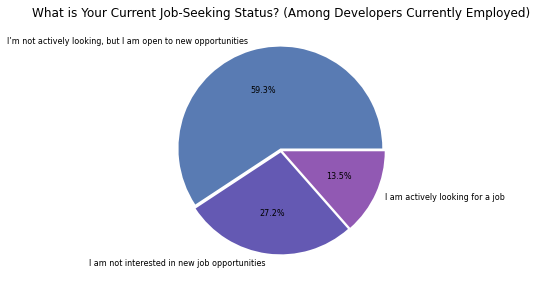

In [39]:
#### Although developers are mostly satisfied - are they open to new job opportunities in general?
seek = feature_overview(df, 'JobSeek', dropna=True)
# plot
seek_pie, seek_ax = pie_chart(seek, 'share', title=f'What is Your Current Job-Seeking Status? (Among Developers Currently Employed)', filename='job_seek_pie', colors=['#597BB3', '#6459B3', '#9159B3'])

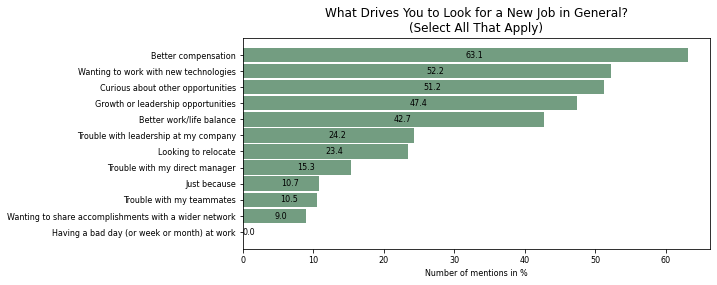

In [40]:
#### MOST IMPORTANT PUSH FACTORS: In general, what drives you to look for a new job?
df_jobhunt = get_multiple_choice(df, 'NEWJobHunt_', NEWJobHuntAnswers)
# plot
jobhunt_bar, jobhunt_ax = plot.horizontal_bars(df_jobhunt, 'share', percentage=True, xlabel='Number of mentions in %', title='What Drives You to Look for a New Job in General?\n(Select All That Apply)', filename='jobhunt_bar')

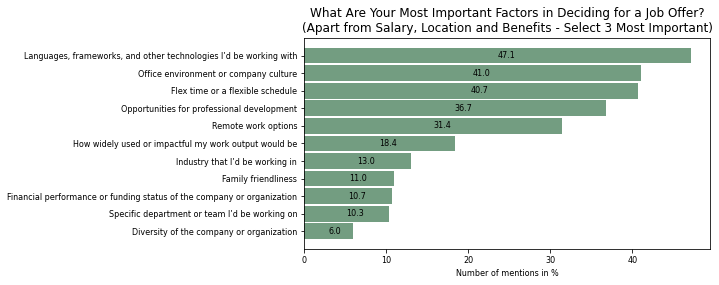

In [41]:
#### MOST IMPORTANT PULL FACTORS: Imagine that you are deciding between two job offers with the same
#### compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?
df_factors = get_multiple_choice(df, 'JobFactors_', JobFactorsAnswers)
# plot
factors_bar, factors_ax = plot.horizontal_bars(df_factors, 'share', percentage=True, xlabel='Number of mentions in %', title=f'What Are Your Most Important Factors in Deciding for a Job Offer?\n(Apart from Salary, Location and Benefits - Select 3 Most Important)', filename='factors_bar')

#### Does more responsibility and participation in decision-making processes correlate with a higher job satisfaction as a developer?

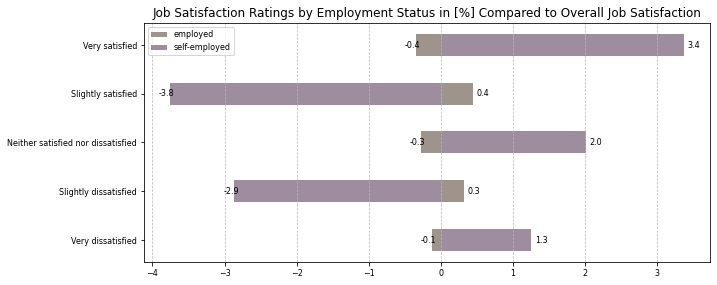

In [51]:
#### Job Satisfaction Comparison: Self-Employed vs. Employed (full-time or part-time)

# filter row entries for employment status
df_selfemp = df.loc[df.Employment == "Independent contractor, freelancer, or self-employed"]
df_emp = df.loc[(df.Employment == "Employed full-time")|(df.Employment == "Employed part-time")]

# get job satisfaction ratings for the two groups
happy_selfemp = (feature_overview(df_selfemp, 'Job_Satisfaction', dropna=True)).add_prefix('selfemp_')
happy_emp = (feature_overview(df_emp, 'Job_Satisfaction', dropna=True)).add_prefix('emp_')

# compare to average job satisfaction
df_employment = pd.concat([(happy_emp['emp_share'].sub(happy['share'], axis=0)).rename('employed'),
                           (happy_selfemp['selfemp_share'].sub(happy['share'], axis=0)).rename('self-employed')],
                          axis=1)

# plot
fig, ax = horizontal_bars_df(df_employment.reindex(happy_index), title='Job Satisfaction Ratings by Employment Status in [%] Compared to Overall Job Satisfaction', color=['#9F948C', '#9E8C9F'], filename='happiness_by_employment', percentage=True)

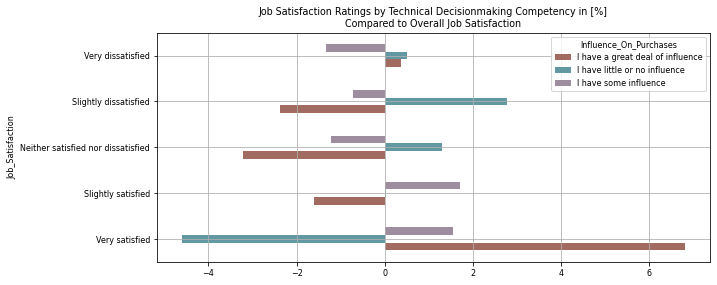

In [43]:
#### Job Satisfaction Comparison - by Influence On Purchases (developer position)
purchase_count, purchase_share = feature_by_x(df, 'Job_Satisfaction', 'Influence_On_Purchases')
purchase_share = purchase_share.reindex(happy_index)
purchase_share_diff = purchase_share.sub(happy['share'], axis=0)
# plot
fig, ax = plot.horizontal_bars_df_multi(purchase_share_diff.reindex(happy_index).dropna(), title='Job Satisfaction Ratings by Technical Decisionmaking Competency in [%]\nCompared to Overall Job Satisfaction', color=['#A26B61', '#6198A2', '#9E8C9F'], filename='happiness_by_purchase', percentage=True)

#### Does the type of development work have an impact on job satisfaction?

#### Are developers with a higher salary happier?

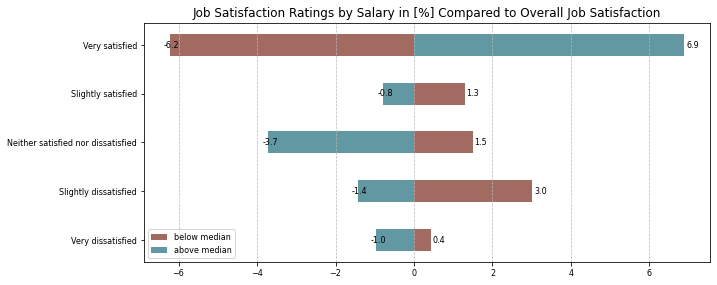

In [52]:
#### Job Satisfaction Comparison: salary groups below and above median salary
sal_count, sal_share = afunc.feature_by_x(df, 'Job_Satisfaction', 'Salary_Group')
sal_share = sal_share.reindex(happy_index)
sal_share_diff = sal_share.sub(happy['share'], axis=0)  # get diffs concerning overall satisfaction
sal_share_diff.index = sal_share_diff.index.rename('Job Satisfaction')
# plot
fig, ax = plot.horizontal_bars_df(sal_share_diff.reindex(happy_index), title='Job Satisfaction Ratings by Salary in [%] Compared to Overall Job Satisfaction', color=['#A26B61', '#6198A2'], filename='happiness_by_salary', percentage=True)